In [50]:
import root_numpy
import pandas as pd
import numpy as np
import numpy.linalg as la
import copy
import pickle
import os
import networkx as nx
from tqdm import tqdm
from tools.opera_tools import combine_mc_bg, gen_graphx, gen_x_y_dataset, load_bg, load_mc
from create_graph.create_graph import create_graph

In [51]:
pmc = load_mc(filename='./data/mcdata_taue2.root', step=1)

numtracks reduction by cuts:  [18724, 18679, 9616, 9106]
len(pmc): 9106


In [156]:
idx_len_greater_100 = list()
for i in range(len(pmc)):
    if len(pmc.iloc[i]['BT_X']) > 200:
        idx_len_greater_100.append(pmc.iloc[i].Event_id)

In [157]:
k = 0
shower = pmc.loc[pmc.Event_id == idx_len_greater_100[k]].iloc[0]

shower_add = pmc.loc[pmc.Event_id == idx_len_greater_100[3]].iloc[0]

In [158]:
sx_ele = shower.ele_x
sy_ele = shower.ele_y
sz_ele = shower.ele_z

tx_ele = shower.ele_sx
ty_ele = shower.ele_sy

sx = shower.BT_X.copy() - sx_ele
sy = shower.BT_Y.copy() - sy_ele
sz = shower.BT_Z.copy() - sz_ele
tx = shower.BT_SX.copy()
ty = shower.BT_SY.copy()

sz_copy = np.sqrt(sz**2 + sx**2 + sy**2)
sx = sx - tx_ele * sz
sy = sy - ty_ele * sz
tx -= tx_ele
ty -= ty_ele
sz = sz_copy

In [159]:
sx_add = shower_add.BT_X.copy() - sx_ele
sy_add = shower_add.BT_Y.copy() - sy_ele
sz_add = shower_add.BT_Z.copy() - sz_ele
tx_add = shower_add.BT_SX.copy()
ty_add = shower_add.BT_SY.copy()

sz_copy_add = np.sqrt(sz_add**2 + sy_add**2 + sx_add**2)
sx_add = sx_add - tx_ele * sz_add
sy_add = sy_add - ty_ele * sz_add
tx_add -= tx_ele
ty_add -= ty_ele
sz_add = sz_copy_add

In [160]:
import matplotlib.pyplot as plt

In [161]:
import pandas as pd
import numpy as np

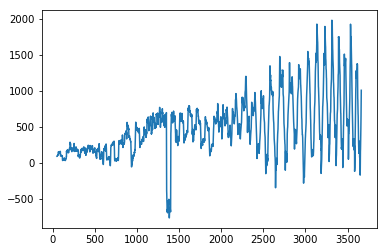

In [162]:
ts = pd.Series(sx)
ts.rolling(window=50).mean().plot()

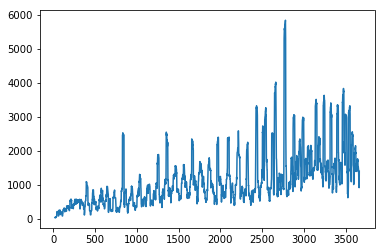

In [163]:
ts = pd.Series(sy)
ts.rolling(window=20).std().plot()
#ts.rolling(window=20).median().plot()

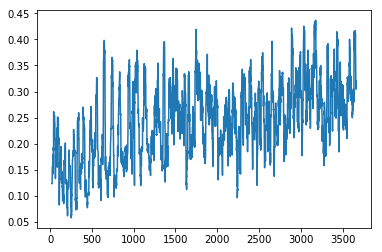

In [184]:
ts = pd.Series(tx)
ts.rolling(window=20).std().plot()
#ts.rolling(window=20).median().plot()

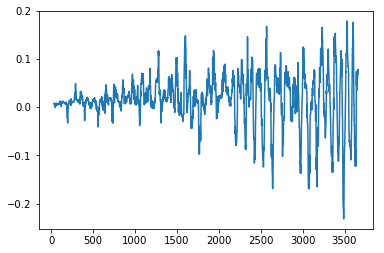

In [185]:
ts.rolling(window=30).median().plot()

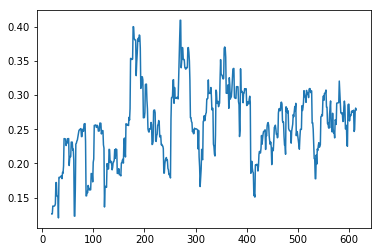

In [167]:
ts = pd.Series(ty_add)
ts.rolling(window=20).std().plot()
#ts.rolling(window=20).median().plot()

In [173]:
ty_new = np.append(ty, ty_add)

In [174]:
sz_new = np.append(sz, sz_add)

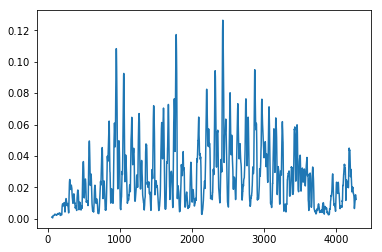

In [182]:
ts = pd.Series(ty_new[np.argsort(sz_new)])
ts.rolling(window=30).median().rolling(window=30).std().plot()

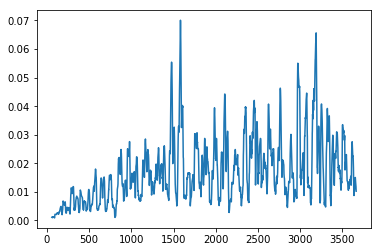

In [183]:
ts = pd.Series(ty)
ts.rolling(window=30).median().rolling(window=30).std().plot()